### 특징검출, 디스크립터, 매칭
특징 검출기(feature detector)는 영상에 관심있는 Feature(Edge, Corner)등을 검출하고, 디스크립터(descriptor)는 검출된 특징점 주위의 밝기, 생삭, 그래디언트 방향 등의 매칭 정보를 계산한다.  

**특징 검출기, 디스크립터, 매칭 과정**  
<img src="https://raw.githubusercontent.com/wjddyd66/wjddyd66.github.io/master/static/img/OpenCV/98.PNG" height="100%" width="100%" />

**Keypoint Detector**  
특징점(Keypoint)을 검출하는 클래스 이다. 주로 코너점을 검출한다.  
- FastFeatureDetector
- MSER
- SimpleBlobDetector
- GFTTDetector

<br>

**Keypoint Detector + Descriptor**  
특징점(Keypoint)와 디스크립터(descriptor)를 같이 추출한다.  
Descriptor는 keypoint에 해당하는 정보이므로 기본적으로 keypoint와 같은 개수로 생성되어지며 실제 유사도를 판별하기 위한 데이터로 활용 되어 진다.  

- BRISK
- ORB
- KAZE
- AKAZE
- SIFT(xfeatures2d)
- SURF(xfeatures2d)

<br>

**Descriptor Matcher**  
두 이미지에서 추출된 Decriptor의 유사도를 비교하여 유사한 descriptor들을 매칭하는 역할을 한다.  
매칭 관련 알고리즘은 KNN알고리즘 기반이다.  
계산방법에 있어서 Brute-force와 Flann(Fast Library for Approximate Nearest Neighbors) 알고리즘 두 가지를 제공한다.  
- BFMatcher
- FlannBasedMatcher

<br>

**drawMatcher**  
Matching된 결과를 user가 직관적으로 파악할 수 있도록 이미지에 표현해주는 utility함수들이다.  

**KeyPoint 클레스**  
<table class="table">
	<tr>
		<td>클레스 멤버</td>
		<td>설명</td>
	</tr>
    <tr>
        <td>class_id</td>
		<td>클래스가 속한 물체의 클래스 번호</td>
	</tr>
    <tr>
        <td>octave</td>
		<td>특징점이 추출된 옥타브</td>
	</tr>
    <tr>
        <td>pt</td>
		<td>특징점 좌표</td>
	</tr>
    <tr>
        <td>response</td>
		<td>특징점 반응 세기</td>
	</tr>
    <tr>
        <td>size</td>
		<td>의미 있는 특징점 이웃의 지름</td>
	</tr>
    <tr>
        <td>angle</td>
		<td>특징점 방향각</td>
	</tr>
    <tr>
        <td>convert</td>
		<td>특징점을 좌표 배열로 반환하거나, 반대로 좌표 배열을 특징점으로 변환</td>
	</tr>
    <tr>
        <td>overlap</td>
		<td>특징점 쌍을 겹침</td>
	</tr>
</table>
<br>
<br>


**참고사항1(SIFT, SURF)**  
현재 SIFT와 SURF는 opencv_contrib/xfeatures2d가 포함하여 빌드해야 사용할 수 있다.  

>I had the same problem. It seems that SIRF and SURF are no longer available in opencv > 3.4.2.16. I chose an older opencv-python and opencv-contrib-python versions and solved this problem. Here is the history version about opencv-python, and I use the following code :

출처: <a href="https://stackoverflow.com/questions/52305578/sift-cv2-xfeatures2d-sift-create-not-working-even-though-have-contrib-instal">stack overflow</a><br>
따라서 OpenCV를 shift 디스크립터를 지원해주는 특정 Version으로 재설치 하여야 한다.  
```code
pip uninstall opencv-python
pip install opencv-python==3.4.2.16
pip install opencv-contrib-python==3.4.2.16
```
<br>

**참고사항2(특징점)**  
영상에서 물체를 추적하거나 인식할 때, 영상과 영상을 매칭할 때 가장 일반적인 방법은 영상에서 주요 특징점(keypoint)을 뽑아서 매칭하는 것입니다. 특징점을 영어로는 보통 keypoint 또는 interesting point라 부른다.  
이러한 특징점은 앞선 Post에서 계속하여 언급한 Feature와 같은 개념으로 이해하여도 된다.  
중요한 것은 이러한 Feature중 **좋은 영상 특징점(keypoint)가 되기 위한 조건이다.**  
그러한 조건은 다음과 같다.
- 물체의 형태나 크기, 위치가 변해도 쉽게 식별이 가능할 것
- 카메라의 시점, 조명이 변해도 영상에서 해당 지점을 쉽게 찾아낼 수 있을 것



#### 필요한 라이브러리 임포트

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets 
import IPython.display as display
from ipywidgets import Layout, Button, Box, Layout, Image, IntSlider, AppLayout

### KeyPoint Detector

### FastFeatureDetector 특징 검출
<img src="https://mblogthumb-phinf.pstatic.net/20160315_175/samsjang_1458011575143lM26f_PNG/%C4%B8%C3%B3.PNG?type=w2"><br>
사진 출처:<a href="https://m.blog.naver.com/PostView.nhn?blogId=samsjang&logNo=220655420471&proxyReferer=https%3A%2F%2Fwww.google.com%2F">옥수별 블로그</a><br>

FastFeatureDetector는 위의 사진과 같이 특정 Pixel을 기점으로 원을 그렸을때의 주변 Pixel과의 차이를 통하여 Corner점을 검출한다.  
<img src="https://mblogthumb-phinf.pstatic.net/20160315_275/samsjang_14580141960963OLmf_PNG/%C4%B8%C3%B3.PNG?type=w2"><br>
사진 출처:<a href="https://m.blog.naver.com/PostView.nhn?blogId=samsjang&logNo=220655420471&proxyReferer=https%3A%2F%2Fwww.google.com%2F">옥수별 블로그</a><br>
위와 같은 주변 Pixel은 3가지 상태 중 하나로서 결정된다.  
이러한 후보 Pixel중 코너인지 아닌지에 관해 많은 정보를 제공하는 Pixel X를 ID3을 적용하여 계산  <br>

**참조 (FastFeatureDetector 자세한 내용)**: <a href="https://m.blog.naver.com/PostView.nhn?blogId=samsjang&logNo=220655420471&proxyReferer=https%3A%2F%2Fwww.google.com%2F">옥수별 블로그</a><br>

#### FastFeatureDetector 특징 검출1
- <code>cv2.FastFeatureDetector.create()</code>:FastFeatureDetector 객체 생성
- <code>cv2.FastFeatureDetector.detect()</code>: 특징점 검출
- <code>cv2.drawKeypoints()</code>: 추출한 특징점 표시

<br>

- src: 원본 이미지
- dst: FastFeatureDetector로 특징점 추축
- dst2: 지역 극값 억제 x
- dst3: 지역 극값 억제

In [3]:
src = cv2.imread('./data/chessBoard.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

#Component 선언
IntSlider_Threshold = IntSlider(
    value=1,
    min=1,
    max=50,
    step=1,
    description='Threshold: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

def layout(header, left, right):
    layout = AppLayout(header=header,
          left_sidebar=left,
          center=None,
          right_sidebar=right)
    return layout

wImg_original = Image(layout = Layout(border="solid"), width="45%")
wImg_dst = Image(layout = Layout(border="solid"), width="45%")
wImg_dst2 = Image(layout = Layout(border="solid"), width="45%")
wImg_dst3 = Image(layout = Layout(border="solid"), width="45%")

items = [wImg_original,wImg_dst]
items2 = [wImg_dst2,wImg_dst3]
Left_image =Box(items)
Right_image = Box(items2)
box = layout(IntSlider_Threshold,Left_image,Right_image)

tab_nest = widgets.Tab()
tab_nest.children = [box]
tab_nest.set_title(0, 'Fast Feature Detect1')
tab_nest

tmpStream = cv2.imencode(".jpeg", src)[1].tostring()
wImg_original.value = tmpStream

display.display(tab_nest)

#Event 선언
threshold = 1
    
def on_value_change_Threshold(change):
    global threshold
    threshold = change['new']
    make_fastfeature(threshold)

def make_fastfeature(input_threshold):
    fastF = cv2.FastFeatureDetector.create(threshold = input_threshold)
    kp = fastF.detect(gray)
    dst = cv2.drawKeypoints(gray,kp,None,color=(0,0,255))
    print('len(kp)=',len(kp))

    fastF.setNonmaxSuppression(False)
    kp2 = fastF.detect(gray)
    dst2 = cv2.drawKeypoints(src,kp2,None,color=(0,0,255))
    print('len(kp2)=',len(kp2))

    dst3 = src.copy()
    points = cv2.KeyPoint_convert(kp)
    for cx,cy in points:
        cv2.circle(dst3,(cx,cy),3,color=(255,0,0),thickness=-1)
        
    tmpStream = cv2.imencode(".jpeg", dst)[1].tostring()
    wImg_dst.value = tmpStream
    
    tmpStream = cv2.imencode(".jpeg", dst2)[1].tostring()
    wImg_dst2.value = tmpStream
    
    tmpStream = cv2.imencode(".jpeg", dst3)[1].tostring()
    wImg_dst3.value = tmpStream

#초기화 작업
make_fastfeature(threshold)

#Component에 Event 장착
IntSlider_Threshold.observe(on_value_change_Threshold, names='value')

len(kp)= 6145
len(kp2)= 38842
len(kp)= 550
len(kp2)= 3671


#### FastFeatureDetector2
추출한 특징점을 Filtering과 Sortirng을 통하여 특징점의 수를 줄이는 역할을 한다.  
- distance: 두 점 사이의 거리를 측정
- make_sorting: 추출한 특징점의 response(반응 세기)를 기준으로 높은 것을 선택
- filteringByDistance: 추출한 특징점의 거리를 측정하여 **각 거리의 점 일반화**(일정거리안의 점들은 하나의 점으로 통일)


In [4]:
src = cv2.imread('./data/chessBoard.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

#Component 선언
IntSlider_Threshold = IntSlider(
    value=10,
    min=10,
    max=50,
    step=1,
    description='Threshold: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider_Threshold2 = IntSlider(
    value=1,
    min=1,
    max=50,
    step=1,
    description='Threshold: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider_Threshold3 = IntSlider(
    value=10,
    min=10,
    max=50,
    step=1,
    description='Threshold: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider_Threshold4 = IntSlider(
    value=1,
    min=1,
    max=50,
    step=1,
    description='Threshold: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

def layout(header, left, right):
    layout = AppLayout(header=header,
          left_sidebar=left,
          center=None,
          right_sidebar=right)
    return layout

wImg_original = Image(layout = Layout(border="solid"), width="45%")
wImg_dst = Image(layout = Layout(border="solid"), width="45%")
wImg_dst2 = Image(layout = Layout(border="solid"), width="45%")

items = [IntSlider_Threshold,IntSlider_Threshold2]
items2 = [IntSlider_Threshold3,IntSlider_Threshold4]

Sorting =Box(items)
Filtering = Box(items2)

box = layout(Sorting,wImg_original,wImg_dst)
box2 = layout(Filtering,wImg_original,wImg_dst2)

tab_nest = widgets.Tab()
tab_nest.children = [box,box2]
tab_nest.set_title(0, 'Sorting')
tab_nest.set_title(1, 'Filtering')
tab_nest

tmpStream = cv2.imencode(".jpeg", src)[1].tostring()
wImg_original.value = tmpStream

display.display(tab_nest)

#Event 선언
threshold = 10
threshold2 = 1
threshold3 = 10
threshold4 = 1
    
def on_value_change_Threshold(change):
    make_sorting()
    
def on_value_change_Threshold2(change):
    make_filtering()

def make_sorting():
    global threshold,threshold2
    threshold = IntSlider_Threshold.value
    fastF = cv2.FastFeatureDetector_create(threshold = threshold)
    kp = fastF.detect(gray)
    IntSlider_Threshold2.max = len(kp)-1
    threshold2 = IntSlider_Threshold2.value
    kp = sorted(kp,key = lambda f:f.response,reverse=True)
    dst = cv2.drawKeypoints(gray,kp[:threshold2],None,color=(0,0,255))
    tmpStream = cv2.imencode(".jpeg", dst)[1].tostring()
    wImg_dst.value = tmpStream
    
def distance(f1,f2):
    x1,y1 = f1.pt
    x2,y2 = f2.pt
    return np.sqrt((x2-x1)**2+(y2-y1)**2)

def filteringByDistance(kp,distE = 0.5):
    size = len(kp)
    mask = np.arange(1,size+1).astype(np.bool8)
    for i,f1 in enumerate(kp):
        if not mask[i]:
            continue
        else:
            for j,f2 in enumerate(kp):
                if i==j:
                    continue
                if distance(f1,f2) < distE:
                    mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])

def make_filtering():
    global threshold3,threshold4
    threshold3 = IntSlider_Threshold3.value
    threshold4 = IntSlider_Threshold4.value
    fastF = cv2.FastFeatureDetector_create(threshold = threshold3)
    kp = fastF.detect(gray)
    kp = filteringByDistance(kp,threshold4)
    
    dst = cv2.drawKeypoints(gray,kp,None,color=(0,0,255))
    tmpStream = cv2.imencode(".jpeg", dst)[1].tostring()
    wImg_dst2.value = tmpStream
    
#초기화 작업
make_sorting()
make_filtering()

#Component에 Event 장착
IntSlider_Threshold.observe(on_value_change_Threshold, names='value')
IntSlider_Threshold2.observe(on_value_change_Threshold, names='value')
IntSlider_Threshold3.observe(on_value_change_Threshold2, names='value')
IntSlider_Threshold4.observe(on_value_change_Threshold2, names='value')

### MSER 특징 검출
MSER(Maximally Stable External Regions)은 그레이스케일 영상 또는 컬러영상에서 주변보다 더 밝거나 더 어두운 영역으로 임계값의 범위에서 안정적인 영역을 특징으로 검출한다. 이러한 임계값은 delta의 변수 값으로서 사용자가 지정한다.  
**delta가 크면 더욱 적은 개수의 영역이 검출된다.**

len(kp)= 210


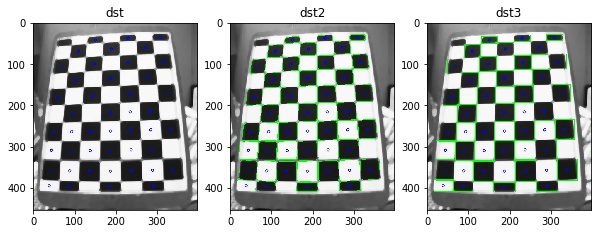

In [5]:
src = cv2.imread('./data/chessBoard.jpg')
src = cv2.medianBlur(src,ksize=9)
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

mserF = cv2.MSER_create(30)
kp = mserF.detect(gray)
print('len(kp)=',len(kp))
dst = cv2.drawKeypoints(gray,kp,None,color=(0,0,255))

dst2 = dst.copy()
regions,bboxes = mserF.detectRegions(gray)
hulls = [cv2.convexHull(p.reshape(-1,1,2)) for p in regions]
cv2.polylines(dst2,hulls,True,(0,255,0))

dst3 = dst.copy()
for i,pts in enumerate(regions):
    box = cv2.fitEllipse(pts)
    x,y,w,h = bboxes[i]
    cv2.rectangle(dst3,(x,y),(x+w,y+h),(0,255,0))
    
plt.figure(figsize=(10,10))
imgae1=plt.subplot(1,3,1)
imgae1.set_title('dst')
plt.imshow(dst)

imgae2=plt.subplot(1,3,2)
imgae2.set_title('dst2')
plt.imshow(dst2)

imgae3=plt.subplot(1,3,3)
imgae3.set_title('dst3')
plt.imshow(dst3)

plt.show()

### SimpleBlobDetector
원(Circle)으로 BLOB(binary large objects)를 검출한다.  
- blobColor: 0(검은색) ~ 255(흰색) 특징점을 필터링
- minArea, maxArea: 면적 크기로 필터링
- minCircularity, maxCircularity: 원형 정도로 필터링
- convexity: 볼록다각형 면적 비율을 필터링


len(kp)= 34


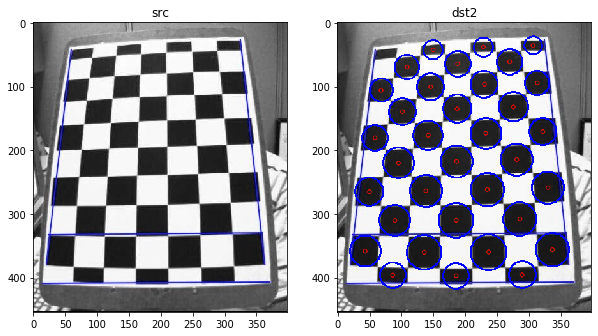

In [26]:
src = cv2.imread('./data/chessBoard.jpg')
#gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

params = cv2.SimpleBlobDetector_Params()
params.blobColor = 0
params.thresholdStep=5
params.minThreshold=20
params.maxThreshold = 100
params.minDistBetweenBlobs = 5
params.filterByArea = True
params.minArea = 25
params.maxArea = 5000
params.filterByConvexity = True
params.minConvexity = 0.89

blobF = cv2.SimpleBlobDetector_create()
kp = blobF.detect(gray)
print('len(kp)=',len(kp))
dst = cv2.drawKeypoints(src,kp,None,color=(255,0,0))

for f in kp:
    r = int(f.size/2)
    cx,cy = f.pt
    cv2.circle(dst,(round(cx),round(cy)),r,(0,0,255),2)

    
plt.figure(figsize=(10,10))
imgae1=plt.subplot(1,2,1)
imgae1.set_title('src')
plt.imshow(src)

imgae2=plt.subplot(1,2,2)
imgae2.set_title('dst2')
plt.imshow(dst)

### GFTTDetector
<code>cv2.cornerHarris()</code>또는 <code>cv2.cornerMinEigenVal</code>로 계산한 코너점 측정 값중 인자로 전달한 Parameter에 맞게 Filtering  
- maxCorner: 최대 코너점 개수
- qualityLevel: 코너점 측정값 중에서 최대값(maxQuality)에 곱해져, 코너점 측정값이 qualityLevel * maxQuality보다 작은 모든 코너점 제거
- minDistance: 코너점 사이의 최소 거리
- blockSize: 코너점 계산을 위한 블록의 크기
- useHarrisDetector: <code>cv2.cornerHarris()</code>사용할지 여부


len(kp)= 541
len(kp2)= 150


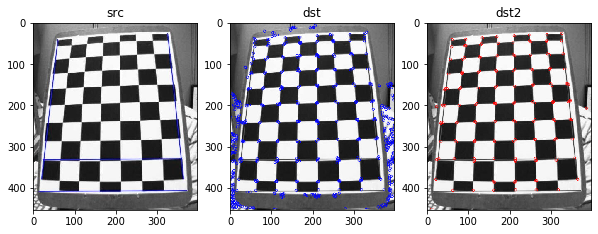

In [6]:
src = cv2.imread('./data/chessBoard.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

goodF = cv2.GFTTDetector_create()
kp = goodF.detect(gray)
print('len(kp)=',len(kp))
dst = cv2.drawKeypoints(gray,kp,None,color=(0,0,255))

goodF2 = cv2.GFTTDetector_create(maxCorners=150,
                                qualityLevel=0.1,
                                minDistance=2,
                                useHarrisDetector=True)

kp2 = goodF2.detect(gray)
print('len(kp2)=',len(kp2))
dst2 = cv2.drawKeypoints(gray,kp2,None,color=(255,0,0))

plt.figure(figsize=(10,10))
imgae1=plt.subplot(1,3,1)
imgae1.set_title('src')
plt.imshow(src)

imgae2=plt.subplot(1,3,2)
imgae2.set_title('dst')
plt.imshow(dst)

imgae3=plt.subplot(1,3,3)
imgae3.set_title('dst2')
plt.imshow(dst2)

plt.show()

### 디스크립터
위에서 **Descriptor는 keypoint에 해당하는 정보이므로 기본적으로 keypoint와 같은 개수로 생성되어지며 실제 유사도를 판별하기 위한 데이터로 활용 되어 진다.**라고 정의하였다.  
아래 Method는 이러한 Descripter를 확인하기 위하여 공통적으로 사용하는 Method를 정의해둔 것 이다.  

#### 공통 Method
- make_poly_circle: Filtering된 점들을 받아서 다각형과 원으로서 표시한다.
- make_some_discripter: 
 - 1) KeyPoints를 FastFeatureDetector, MSER, SimpleBlobDetector, GFTTDetector로서 찾아낸다.
 - 2) 찾아낸 KeyPoints를 dst에 표시한다.
 - 3) KeyPoints를 반응값이 높은 것 부터 정렬
 - 4) 반응값이 가장 큰 점에서 거리가 10이하인 점만을 Filtering
 - 5) Filtering한 KeyPoint를 통하여 디스크립터 계산
 - 6) 계산 결과 디스크립터를 make_poly_circle을 통하여 dst2에 표시
 - 7) dst, dst2 return
- plt_show: 입력받은 dst, dst2, Descripter를 통하여 한번에 Image로서 출력

In [6]:
def make_poly_circle(filtered_kp, dst):
    for f in filtered_kp:
        x,y = f.pt
        size = f.size
        rect = ((x,y),(size,size),f.angle)
        box = cv2.boxPoints(rect).astype(np.int32)
        cv2.polylines(dst,[box],True,(0,255,0),2)
        cv2.circle(dst,(round(x),round(y)),5,(255,0,0),5)
    return dst

def make_some_discripter(input_descripter,option=0,input_threshold=30):
    descripter = []
    kp = []
    dst = []
    dst2 = []
    descripter.append(cv2.FastFeatureDetector_create(threshold=input_threshold))
    descripter.append(cv2.MSER_create(input_threshold))
    descripter.append(cv2.SimpleBlobDetector_create())
    descripter.append(cv2.GFTTDetector_create(maxCorners=150))
    if option !=0:
        descripter.append(option)
    for i,d in enumerate(descripter):
        kp.append(d.detect(gray))
        dst.append(cv2.drawKeypoints(gray,kp[i],None,color=(255,0,0)))
    for k in kp:
        k = sorted(k,key=lambda f:f.response, reverse=True)
        filtered_k = filteringByDistance(k,10)
        print('len(filterde_k)=',len(filtered_k))
        filtered_k,des = input_descripter.compute(gray,filtered_k)
        d = cv2.drawKeypoints(gray,filtered_k,None,color=(0,0,255))
        d = make_poly_circle(filtered_k,d)
        dst2.append(d)
    return dst,dst2

def plt_show(dst,dst2,Descripter,option=0):
    Detector = ['FastFeatureDetector','MSER','SimpleBlobDetector','GFTTDetector']
    if option !=0:
        Detector.append(option)
        
    Descripter = Descripter
    plt.figure(figsize=(20,10))
    plt.axis('off')
    for i in range(len(dst)):
        imgae=plt.subplot(2,len(dst),i+1)
        str_title = Detector[i]
        imgae.set_title(str_title)
        plt.axis('off')
        plt.imshow(dst[i])

        imgae=plt.subplot(2,len(dst),i+len(dst)+1)
        imgae.set_title('After ' + Descripter)
        plt.axis('off')
        plt.imshow(dst2[i])

### BRISK 디스크립터 계산
참조: <a href="http://blog.naver.com/PostView.nhn?blogId=hms4913&logNo=220035222144">BRISK 알고리즘 자세한 내용</a><br>
BRISK(Binary Robust Invariant Scalable Keypoints)는 FAST 또는 AGIST를 사용하여 스케일 공간에서 피라미드 기반으로 특징점을 검출하고, 디스크립터 계산은 특징점 근처에서 동심원 기반의 샘플링 패턴을 이용하여 이진 디스크립터를 계산한다.

len(filterde_k)= 117
len(filterde_k)= 57
len(filterde_k)= 34
len(filterde_k)= 70


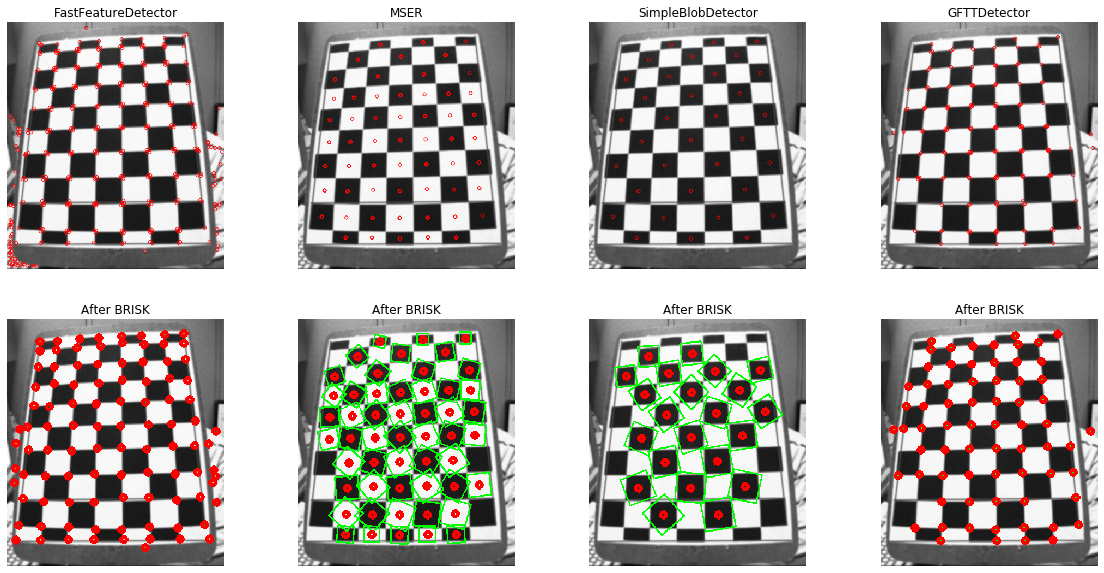

In [40]:
briskF = cv2.BRISK_create()
        
dst,dst2 = make_some_discripter(briskF)
plt_show(dst,dst2,'BRISK')

### SIFT 특징 검출 및 디스크립터 계산
**SIFT(Scale-Invariant Feature Transform)**  
본 내용은 <a href="https://bskyvision.com/21">bskyvision</a>, <a href="https://darkpgmr.tistory.com/137">다크프로그래머</a>을 참조하여 작성하였습니다.  

SIFT는 이미지의 크기나 회전에 불변하는 특징을 추출하는 알고리즘이다.  
즉, 가장 중요한 것은 **크기, 회전**두가지에 대해서 불변하는 특징점을 추출하는 알고리즘이라는 것 이다.  

**크기 불변**  
크기에 불변하는 특징점을 찾기 위한 과정을 살펴보자.  
<br>
**1. Scale Space 만들기**  
먼저 원본 이미지에 대한 Scale 변환 및 Gaussian Filter를 통한 Bluring을 수행한다.  
<img src="https://t1.daumcdn.net/cfile/tistory/2325114F5926EDE43B"><br>
사진 참조:<a href="https://bskyvision.com/21">bskyvision</a><br>
원본사진을 다양한 Scale로 변환 후 Bluring과정을 거침으로 인하여 서로 다른 Image를 연산하게 된다.  
Bluring에 대한 식은 다음과 같다.  
<p>$$L(x,y,\sigma) = G(x,y,\sigma) * I(x,y)$$</p>
<p>$$G(x,y,\sigma) = \frac{1}{2\pi\sigma^2}e^{-(x^2+y^2)/2\sigma^2}$$</p>
여기서의 <span>$\sigma$</span>의 초기값은 Image의 크기에 따라서 다르게 주어진다.  
즉 원본 이미지의 초기 <span>$\alpha = \frac{1}{\sqrt{2}}$</span>라고 하면 원본 이미지의 가로, 세로가 반반이 된 Image의 경우 <span>$4\sigma$</span>를 초기값으로 주고 Blur를 진행한다.

**이러한 결과로 인하여 Image의 Scale이 작을 경우 초기 Blur가 더 심하게 된 것을 확인할 수 있다.**  

**참고사항 Scale Space**  
앞으로의 크기에 불변하는 특징점을 찾이 위하여 사용하는 Scale Space에 대한 조금 더 정확한 정보가 필요하여 Scale Space에 대해서 좀더 자세히 알아보자. 

**1. 스케일**  
스케일이란 어느 한 영상의 Image를 볼때 얼만큼의 크기로 살펴볼건지에 대한 값이다.  
예를들어 아래 그림과 같은 형태의 물체는 큰 스케일(붉은색 박스)에서는 명확히 코너점으로 인식되겠지만 작은 스케일(연두색 박스)에서는 완만한 곡선 또는 직선으로밖에 인식되지 못할 것 이다.  
<img src="https://t1.daumcdn.net/cfile/tistory/265F7F33536CC2AD26"><br>
사진 출처:<a href="https://darkpgmr.tistory.com/137">다크프로그래머</a><br>
이러한 스케일(scale)문제에 있어서 가장 근원적인 해결책은 **대상을 여러 스케일에 걸쳐 표현하는 것**이다.  
<br>
**2. 이미지 피라미드**  
이러한 대상을 여러 스케일에 걸쳐 표현하는 방식을 **이미지 피라미드(image pyramid)**라고 표현한다.  
**이미지 피라미드란 입력 이미지의 크기를 단계적으로 변화시켜 가면서 필요한 분석 작업을 하는 것 이다.**  
이러한 각각의 이미지의 스케일의 차이를 스케일 단계(scale step)이라고 표현한다.  
예를들어 스케일의 단계의 값이 1.1이라면 원본 이미지의 크기는 1 -> 다음 이미지의 크기는 1/(1.1) -> 다음 이미지의 크기는 1(1.1 * 1.1)로서 표현된다.  
<br>
**3. Scale Space**  
이러한 서로다른 이미지를 같은 공간에서 표현되어진 것이 바로 **Scale Space**이다.  
Scale Space를 생성하는 식은 위에서 정의하였으므로 그 식이 의미하는 것이 무엇인지를 알아야 한다.  
먼저 이미지 피라미드를 생성하기 위하여 이미지의 크기를 변화시켜야 하는데 Scale Space는 이를 Gaussian Filter를 통하여 Bluring처리를 한다.  
이러한 Bluring을 시키므로 인하여 주변 Pixel값이 통일되게되고 이러한 결과는 **세부적인 Detail이 사라지고 보다 큰 스케일에서의 이미지의 구조를 파악할 수 있다.**  
이러한 결과는 이미지의 Scaling변화를 시키는것과 같은 역활을 한다고 할 수 있다.  

**4. Scale Space와 Octave 표현**  
Scale space는 연속적으로 정의되지만 현실적으로는 모든 스케일에 대해 분석하는 것을 불가능하므로 Scale step을 <span>$\sqrt{2}$</span>값을 주어서 Scale Space를 구성하게 된다.  
<img src="https://t1.daumcdn.net/cfile/tistory/2536EB355370A00711"><br>
사진 출처:<a href="https://darkpgmr.tistory.com/137">다크프로그래머</a><br>

**5. Scale Space의 활용**  
먼저 얻어진 Scale Space의 KeyPoints를 찾기 위해서는 HPF를 거쳐 높은 주파수를 찾아내어야 한다.  
이러한 높은 주파수는 대표적으로 미분 필터를 사용하여 구할 수 있다.  
하지만 **미분연산자는 블러링된 이미지에 미분을 적용하는 것과 Gaussian 필터에 미분을 적용한 후 블러링시키는 것이 동일한 결과를 갖는 매우 좋은 특성을 가지고 있다.**  
<p>$$\frac{\partial f_{\sigma}}{\partial x} = \frac{\partial g_{\sigma}}{\partial x} * f$$</p>
>즉, scale space 상의 이미지들에 직접 미분 연산자를 적용하는 것(좌변)과 Gaussian 필터에 미분을 적용한 후 convolution을 시키는 것(우변)이 동일하다는 것이다. 식 (4) 좌변과 같이 디지털 이미지에 직접 미분을 적용하는 것은 기본적으로 잘 정의되지 않는 ill-posed 문제이지만 우변과 같이 Gaussian 함수의 미분을 구하는 것은 수학적으로 잘 정의되는 well-posed 문제이다. 또한 직접 미분을 구하지 않고 Gaussian 필터에 미분을 적용한 후 블러링시키는 것이 계산상으로도 이득이다. 그리고 이러한 성질은 1차 미분 뿐만 아니라 모든 차수의 미분에 대해 성립한다.

위의 내용에 대해서는 자세히 모르겠다. 일단 식이 왜 저렇게 성립하는 지는 모르겠으나 성립한다고 가정하였을때, 위의 얘기가 맞다는 것 정도만 이해할 수 있다.  

위와같은 식이 성립한다고 하였을때 Laplacian을 이용하여 blob을 찾는 문제를 생각해보면 다음과 같은 식을 얻을 수 있다.  

<p>$$L = \bigtriangledown^2f(x,y) = \frac{\partial^2 f}{\partial x^2}+\frac{\partial^2 f}{\partial y^2}$$</p>
위의 식을 GausianFilter를 통하여 진행되게 되는 식이 LoG(Laplacian of Gaussian)식이고 결과는 아래와 같다.  
<img src="https://t1.daumcdn.net/cfile/tistory/22050F47537182C632"><br>
사진 출처:<a href="https://darkpgmr.tistory.com/137">다크프로그래머</a><br>

**위와 같은 방식을 통하여 다양한 Scale에 대입하여 불변하는 Key Points를 Scale Invariant(스케일에 불변)한 성질을 가지고 있다 할 수 있다.**

**2. DOG 연산**  
DOG(Diffenet of Gaussian)은 옥타브 내에서 인접한 두 개의 블러 이미지들끼리 빼주면 된다.  
<img src="https://t1.daumcdn.net/cfile/tistory/2752BA4B5926EF2210"><br>
사진 참조:<a href="https://bskyvision.com/21">bskyvision</a><br>
**위의 결과로서 원본이미지와 Blur 이미지(LPF Filter통과)의 차이가 극심한 곳은 주변 Pixel과의 차이가 큰 곳으로서 Edge라고 판단할 수가 있다.**  

DoG연산자와 LoG연산자를 살펴보면 다음과 같다.  
먼저 위에서 정의한 Laplacian 식을 살펴보게 되면 다음과 같다.  
<p>$$L = \bigtriangledown^2f(x,y) = \frac{\partial^2 f}{\partial x^2}+\frac{\partial^2 f}{\partial y^2}$$</p>
위의 LoG식을 Gaussian Filter통과 후 scale-normalize LoG로 식을 바꾸면 다음과 같다.  
<p>$$\sigma\bigtriangledown^2G$$</p>
위의 식은 Normalized가 되었으므로 극대값, 극소값이 매우 안정적인 이미지 이다.  
위의 식을 열 확산 방정식으로서 다시 정의하면 아래와 같다.  
<p>$$\frac{\partial G}{\partial \sigma} = \sigma\bigtriangledown^2G$$</p>
위의 식은 아래와 같이 변형될 수 있다.  
<p>$$\frac{\partial G}{\partial \sigma} = \sigma\bigtriangledown^2G \approx \frac{G(x,y,k\sigma)-G(x,y,\sigma)}{k\sigma - \sigma}$$</p>

양변에 우변의 분모를 각각 곱해주면 최종적인 식은 아래와 같다.  
<p>$$G(x,y,k\sigma)-G(x,y,\sigma) = (k-1)\sigma^2\bigtriangledown^2G$$</p>
즉 최종적인 식에서 <span>$\sigma^2$</span>은 scale 정규화 과정에서, (k-1)은 상수로 생각하게 되면 LoG는 DoG로서 무리없이 대채되는 것을 확인할 수 있다.  

**3. keypoints 찾기**  
위와 같은 과정을 거친 DoG이미지들 내에서 극대값, 극소값들의 대략적인 위치를 찾는다.  
<img src="https://t1.daumcdn.net/cfile/tistory/256E083B5926919F15"><br>
사진 참조:<a href="https://bskyvision.com/21">bskyvision</a><br>
즉, 체크하려는 pixel이 26개의 이웃 필셀값 중 가장 크거나 작을 경우 KeyPoints로 선택된다.  
정확한 과정은 아래와 같다.  
<img src="https://t1.daumcdn.net/cfile/tistory/244FB9335926F37D05"><br>
사진 참조:<a href="https://bskyvision.com/21">bskyvision</a><br>
참고사항으로 DoG의 맨 처음과 마지막은 비교할 수 있는 DoG이미지가 하나씩 적으므로 제외한다.  

위와 같은 결과의 keypoints중 각각의 x, y 축으로의 Gradient값을 구해 하나의 값만 크거나 작은 값들은 제거해주는 과정을 거친다.  
**Noise또한 Edge로 판단될 수 있기 때문에 x, y 축으로의 Gradient값이 큰 Corner점만 남기는 Filtering이라고 생각하면 된다.**  

**방향 불변**  
위에서 Scale에 불변하는 점을 찾은면서 keypoints를 찾았다.  
이러한 keypoints 주변의 그레디언트 방향과 크기를 모으고 가장 큰 방향으로 keypoints의 방향을 할당한다.  
<img src="https://t1.daumcdn.net/cfile/tistory/275BD03B5929292918"><br>
사진 참조:<a href="https://bskyvision.com/21">bskyvision</a><br>
위의 그림과 같이 Keypoint주변에 윈도우를 만들어준 뒤 Gausian Bluring -> keypoints의 그레디언트 방향과 크기 계산 -> 할당의 과정을 거친다.  
그레디언트 방향과 크기 계산은 아래와 같다.  
<p>$$m(x,y) = \sqrt{(L(x+1,y)-L(x-1,y))^2+(L(x,y+1)-L(x,y-1))^2}$$</p>
<p>$$\theta(x,y) = tan^{-1}((L(x+1,y)-L(x-1,y))/(L(x,y+1)-L(x,y-1))^2))$$</p>
위와 같은 과정을 거친 과정은 아래와 같다.  
<img src="https://t1.daumcdn.net/cfile/tistory/26470B4D59292B4127"><br>
사진 참조:<a href="https://bskyvision.com/21">bskyvision</a><br>
그 뒤 가우시안 가중함수를 이용해 keypoint에 가까울 수록 좀 더 큰값을, 멀수록 좀 더 작은값을 할당한다.  
<img src="https://t1.daumcdn.net/cfile/tistory/2703FA4959292C2514"><br>
사진 참조:<a href="https://bskyvision.com/21">bskyvision</a><br>
이렇게 얻어진 keypoint에 36개의 bin을 가진 히스토그램으램을 만든다. 360도의 방향을 0~9도, 10~19도, ... ,350~359도로 10도씩 36개로 쪼개서 히스토그램을 만든다.  
<img src="https://t1.daumcdn.net/cfile/tistory/2271244059292F8327"><br>
사진 참조:<a href="https://bskyvision.com/21">bskyvision</a><br>
위와같은 히스토그램에서 가장 높은 bin의 방향이 keypoint의 방향으로 할당된다.  
또 여기서 만약 가장 높은 bin의 80%이상의 높이를 갖는 bin이 있다면 그 방향도 keypoint의 방향으로 인정된다.  

**최종적으로 SIFT특징들 산출하기**  
위치와 회전에 불변하는 Keypoints를 계산하였다.  
이로 인하여 어떠한 Scale에서도 Keypoints를 얻을 수 있고 이러한 keypoints의 방향성 또한 정해줄 수 있었다.  
이러한 keypoint를 식별하기 위하여 특별한 정보를 각각 부여해 주어야 한다.  
각각의 keypoint의 특징을 128개의 숫자로 표현을 한다.  
이를 위해 keypoint주변의 모양변화에 대한 경향을 파악한다.  
keypoint주변에 16 x 16윈도우를 세팅하는데 이 윈도우는 작은 16개의 4 x 4윈도우로 구성된다.  
<img src="https://t1.daumcdn.net/cfile/tistory/2258D63759293B8230"><br>
사진 참조:<a href="https://bskyvision.com/21">bskyvision</a><br>
위와 같은 과정에서 각각 16 윈도우를 8개의 bin만 가지도록 위에서 **방향 불변**과정을 적용한다.  
이렇게 되면 결국 16 x 8 = 128의 숫자(feature vector)를 얻게 되고 이것이 바로 keypoint를 구별하는 값이 된다.  


len(filterde_k)= 8
len(filterde_k)= 1
len(filterde_k)= 0
len(filterde_k)= 8
len(filterde_k)= 7


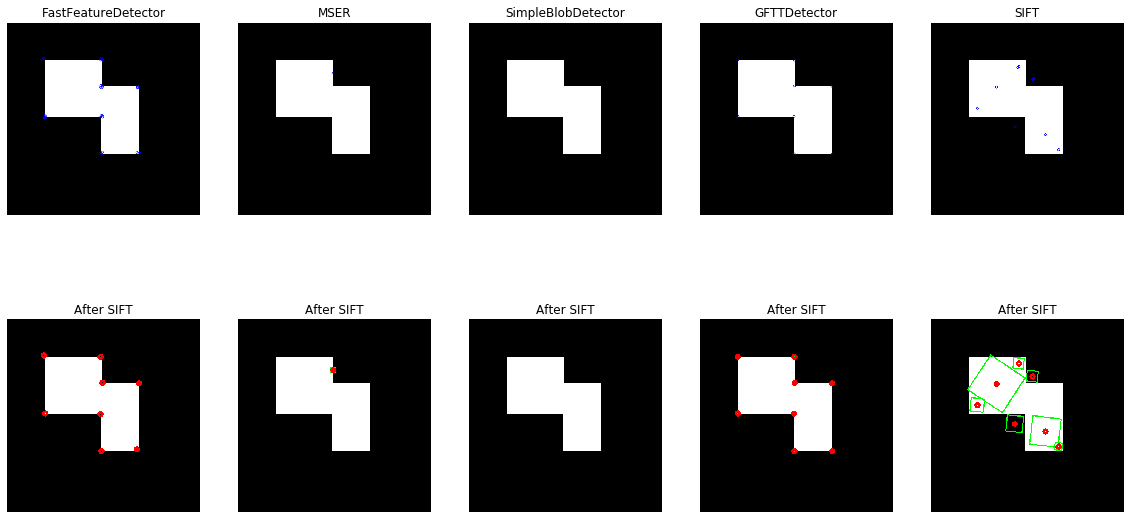

In [11]:
src = cv2.imread('./data/CornerTest.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

shiftF = cv2.xfeatures2d.SIFT_create(edgeThreshold=100)
dst,dst2 = make_some_discripter(shiftF,cv2.xfeatures2d.SIFT_create(),0)
plt_show(dst,dst2,'SIFT','SIFT')

### SURF 특징 검출 및 디스크립터 계산
SURF(Speeded Up Robust Features)는 속도를 높이기 위해 적분 영상을 사용하여 헤시안(Hessian)을 계산하고, 디스크립터 계산에서도 적분 영상을 사용한다.  

해시안 행렬 <span>$H(x,y,\sigma)$</span><br>의 식을 살펴보면 다음과 같다.  
<p>$$H(x,y,\sigma) = \begin{bmatrix}
H_{xx}(x,y,\sigma) & H_{xy}(x,y,\sigma) \\
H_{xy}(x,y,\sigma) & H_{yx}(x,y,\sigma)
\end{bmatrix}$$</p>
<p>$$H_{xx}(x,y,\sigma) = G_{xx}(x,y,\sigma)*I(x,y) = \frac{\partial^2}{\partial x^2}G(x,y,\sigma)*I(x,y)$$</p>
<p>$$H_{yy}(x,y,\sigma) = G_{yy}(x,y,\sigma)*I(x,y) = \frac{\partial^2}{\partial y^2}G(x,y,\sigma)*I(x,y)$$</p>
<p>$$H_{xx}(x,y,\sigma) = G_{xy}(x,y,\sigma)*I(x,y) = \frac{\partial^2}{\partial x\partial y}G(x,y,\sigma)*I(x,y)$$</p>
위의 식에서 알 수 있는 사실은 해시안 행렬은 결국에 Gausian Filter를 미분하여 Edge를 추출한 뒤 <span>$*I(x,y)$</span>를 사용하여 적분한 값을 사용한다는 것 이다.  

여기서 EigenValue를 계산하여 KeyPoints를 계산하게 된다.  
- Eigenvalue가 서로 다른 부호: Keypoints가 아님
- Eigenvalue가 둘 다 음수 혹은 양수: Keypoints임

EigenValue에 따라서 KeyPoints를 판단하는 것이 이해가 안되면 아래 링크를 참조하자.  
<a href="https://wjddyd66.github.io/opencv/2019/10/31/OpenCV(7).html">OpenCV-영상 특징 검출</a><br>

또한 가우시안 분포 헤시안 행렬을 계산할때 계산을 좀 더 단순화 시키기 위해 근사화한 Dxx와 Dyy박스 필터를 사용한다.  
<img src="https://t1.daumcdn.net/cfile/tistory/2536FD44555AFA6818"><br>
사진 출처: <a href="https://vision0814.tistory.com/172">vision0814 블로그</a><br>
위의 사진은 참조한 사진이여서 설명한 식과 조금 다르다.  
**Lxx = Gxx, Lyy = Gyy, Lxy = Gxy로 변경이 필요한다.**  
위의 결과로 좀더 간단하게 식을 나타내면 다음과 같다.  
<p>$$det(H_{approx}) = D_{xx}D_{yy}-(0.9D_{xy})^2$$</p>
상수 0.9는 여러가지 실험을 통하여 일반적인 최적의 값을 뽑아낸듯 하다.  
이제 위에서의 SIFT 디스크립터와 같이 스케일과 방향에대해서 무관한 디스크립터를 뽑기위한 방법을 생각해보자.  

**크기 불변**  
**SIFT필터 사이즈를 고정시키고, 이미지 사이즈를 줄여 관심점을 검출하는 반면, SURF는 SIFT와는 반대로 이미지 스케일을 고정시키고, 필터 사이즈를 키워가며 관심점을 추출한다.**  
**헤시안행렬은 적분값으로 나타낸 행렬이므로 위치를 변경하는 것 만으로 필터 사이즈를 조절할 수 있다. 이러한 장점으로 Image의 Scale을 변형시키는 것이 아닌 단순한 필터사이즈 조절로 인하여 시간이 매우 단축될 것 이다.**  
이러한 필터 크기는 9x9, 15x15, 27x27 등으로 사용하여 스케일 영상을 생성한다.  
여기서 Gausian Filter에서 사용한 <span>$\sigma$</span>와 필터의 크기를 사용하여 스케일 s를 정의한다.  
스케일의 계산 방법은 다음과 같다.  
- 9x9, <span>$\sigma = 1.2$</span>: s = 1.2 x 1 = 1.2
- 27x27 <span>$\sigma = 1.2$</span>: s = 1.2 x 3(27/9) = 3.6

위와같이 스케일을 구한뒤 특징점의 방향을 계산한다.  

**방향 불변**  
Hessian Detector로 찾은 특징점에서 6s의 범위내 dx, dy 의 haar response를 구한다.  
그 뒤 60도 범위 내 Slinding window의 응당값을 구하고 그 값이 최대인 방향을 주 방향으로 정한다.  
<img src="https://t1.daumcdn.net/cfile/tistory/215B4F4D57F9D97416"><br>
사진 출처:<a href="https://rex0725.tistory.com/9">rex0725 블로그</a><br>
특징점 위치에서 20s x 20s 크기 윈도우를 4x4 서브 윈도우로 구분한다.  
각 서브 윈도우에서는 가로, 세로 방향의 haar wavelet response 벡터를 구하는데 각 요소는 다음과 같다.  
<img src="https://t1.daumcdn.net/cfile/tistory/224DF23357F9D9B50F"><br>
사진 출처:<a href="https://rex0725.tistory.com/9">rex0725 블로그</a><br>
즉 위와같이 dx, dy만 구하여 4 x 4 x 2 = 32차원으로 벡터를 표현하는 것이 아닌 2번째와 같은 경우도 있기 때문에 |dx|, |dy|를 추가하여 4 x 4 x 4 = 64 차원으로서 벡터를 표현하고 이것이 방향 불변을 알려주는 디스크립터가 된다.  

**참고사항(haar response)**  
위에서 사용한 haar response는 Haar웨이블릿을 적분 영상에 사용하여 얻은 값이다.  
Wavelet Transform은 영상의 데이터를 다는 주파수 성분들로 분해하고, 각 스케일에 해당하는 해상도 성분을 알수 있게 하는 처리이다.  
각기 다른 스케일에도 적용 가능하다.  
**정확한 수식은 양이 많아서 공부하지 못하였습니다. 자세한 사항은 아래 링크 참조**  
참조: <a href="http://comsi.inje.ac.kr/board/bbs_download.php?code=sub06_02&amp;subcode=&amp;no=10&amp;sd=bbsDown/sub06_02&amp;dn=1&amp;fn=1" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=http://comsi.inje.ac.kr/board/bbs_download.php%3Fcode%3Dsub06_02%26subcode%3D%26no%3D10%26sd%3DbbsDown/sub06_02%26dn%3D1%26fn%3D1&amp;ved=2ahUKEwiV06y0ttXlAhWyxYsBHbUeBB8QFjACegQICxAE">Wavelet Transform</a><br>

len(filterde_k)= 8
len(filterde_k)= 1
len(filterde_k)= 0
len(filterde_k)= 8
len(filterde_k)= 7


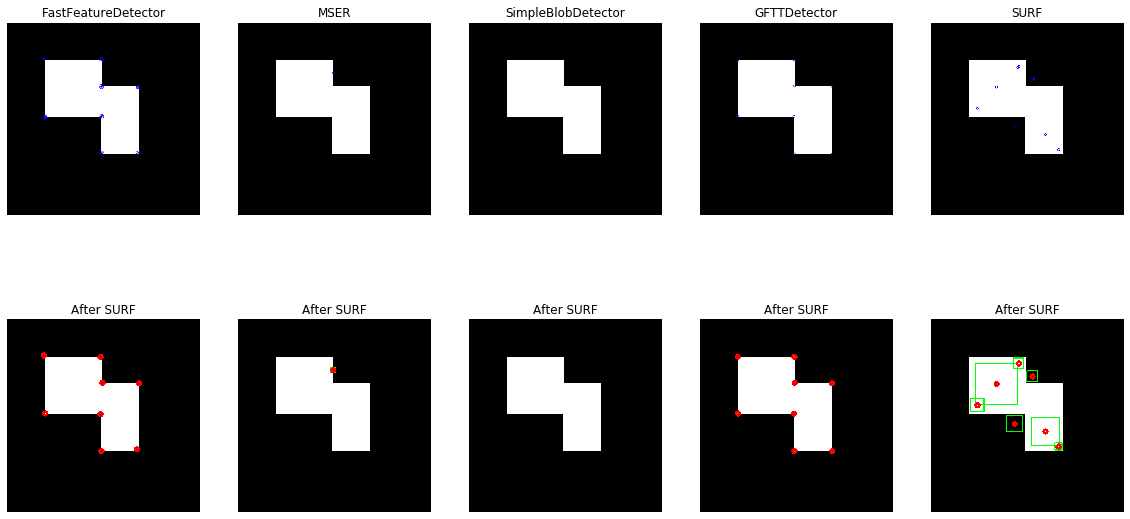

In [12]:
surF = cv2.xfeatures2d.SURF_create(upright=True)
dst,dst2 = make_some_discripter(surF,cv2.xfeatures2d.SIFT_create(),0)
plt_show(dst,dst2,'SURF','SURF')

### KAZE, KAZEF 특징 검출 및 디스크립터 계산
참조: <a href="http://www.robesafe.com/personal/pablo.alcantarilla/kaze.html">KAZE Features 자세한 내용</a><br>

KAZE는 기존의 스케일 공간 특징점 검출방법의 가우시안 피라미드에 의한 방법은 가우시안 블러링 작업이 잡음 제거뿐만 아니라, 물체의 세부사항(detail) 역시 약화시켜, 특징점의 위치를 찾는데 어려움이 있다.  
KAZE는 AOS(additive operator splitting)기법으로 구성한 비선형 스케일 공간에서 비선형확신 필터링으로 특징점을 검출하고 디스크립터를 계산한다.  

**KAZEF 디스크립터는 KAZEF Detector만 가능**

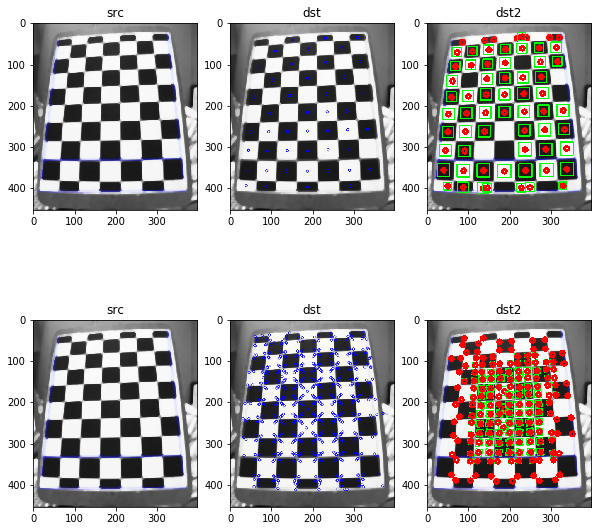

In [7]:
kazeF = cv2.KAZE_create()
akazeF = cv2.AKAZE_create()

kp1 = kazeF.detect(gray)
kp2 = akazeF.detect(gray)
dst = []
dst.append(cv2.drawKeypoints(gray,kp,None,color=(0,0,255)))
dst.append(cv2.drawKeypoints(gray,kp2,None,color=(0,0,255)))

kp1 = sorted(kp1,key=lambda f:f.response, reverse=True)
kp2 = sorted(kp2,key=lambda f:f.response, reverse=True)

filtered_kp = []
kp1 = list(filter(lambda f:f.response>0.03,kp1))
kp2 = list(filter(lambda f:f.response>0.01,kp2))
filtered_kp.append(filteringByDistance(kp1,5))
filtered_kp.append(filteringByDistance(kp2,15))

kp1,des = kazeF.compute(gray,filtered_kp[0])
kp2,des = akazeF.compute(gray,filtered_kp[1])

dst2_1 = src.copy()
dst2_2 = src.copy()
dst2_1 = make_poly_circle(filtered_kp[0],dst2_1)
dst2_2 = make_poly_circle(filtered_kp[1],dst2_2)

plt.figure(figsize=(10,10))
imgae1=plt.subplot(2,3,1)
imgae1.set_title('src')
plt.imshow(src)

imgae2=plt.subplot(2,3,2)
imgae2.set_title('dst')
plt.imshow(dst[0])

imgae3=plt.subplot(2,3,3)
imgae3.set_title('dst2')
plt.imshow(dst2_1)

imgae1=plt.subplot(2,3,4)
imgae1.set_title('src')
plt.imshow(src)

imgae2=plt.subplot(2,3,5)
imgae2.set_title('dst')
plt.imshow(dst[1])

imgae2=plt.subplot(2,3,6)
imgae2.set_title('dst2')
plt.imshow(dst2_2)

plt.show()

### OBR 디스크립터 계산
ORB(Oriented FAST and Rotated BRIEF)는 FAST와 BRIEF를 기반으로 만들어진 알고리즘이다.  
SIFT는 위에서 계산하였듯이 디스크립터를 128차원의 실수 벡터로서 표현한다.  
이러한 잠재적 리소스 낭비를 방지하고자 BRIEF는 설명자 벡터를 특징점의 픽셀값을 기준으로 0, 1 이진값으로 나타내어 많은 값을 줄여서 빠르고 정확하게 표현하는 알고리즘이다.  

**(1) Keypoints 추출**  
- FAST로 Feature추출: FAST 알고리즘은 Corner와 Edge를 구별못하는 단점이 있다.
- Harris corner Detection을 사용하여 FAST로 필터링한 Keypoints에서 코너성이 가장 큰 N개를 선택한다.
- 코너점의 밝기(O)가 모멘트 계산에 의한 밝기 중심 <span>$C = (m_{10}/m_{00},m_{01}/m_{00})$</span>으로부터 떨어져, O에서 C로의 벡터의 방향을 특징점의 방향으로 계산
- <span>$\theta = atan2(m_{01},m_{10})$</span>로서 Keypoints의 방향 계산

<img src="https://miro.medium.com/max/176/0*kpbH_bTsvFR35oan"><br>
사진 출처:<a href="https://medium.com/software-incubator/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf">medium.com</a><br>

**(2) 디스크립터 계산**  
위에서 찾은 ORB는 Keypoints의 방향에 따라서 BRIEF를 조정하여 계산하는 방법을 사용한다.  
위에서도 설명하였듯이 0,1만 포함하는 Vector이다.  
<img src="https://miro.medium.com/max/400/1*XWpgdt4Z4xeT-g8hn5JLsA.png"><br>
사진 출처:<a href="https://medium.com/software-incubator/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf">medium.com</a><br>

정확한 방법은 좀 더 공부해야 한다.  
아래 링크를 참조하자.  
참조: <a href="https://medium.com/software-incubator/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf">medium.com</a><br>

len(filterde_k)= 117
len(filterde_k)= 57
len(filterde_k)= 34
len(filterde_k)= 70


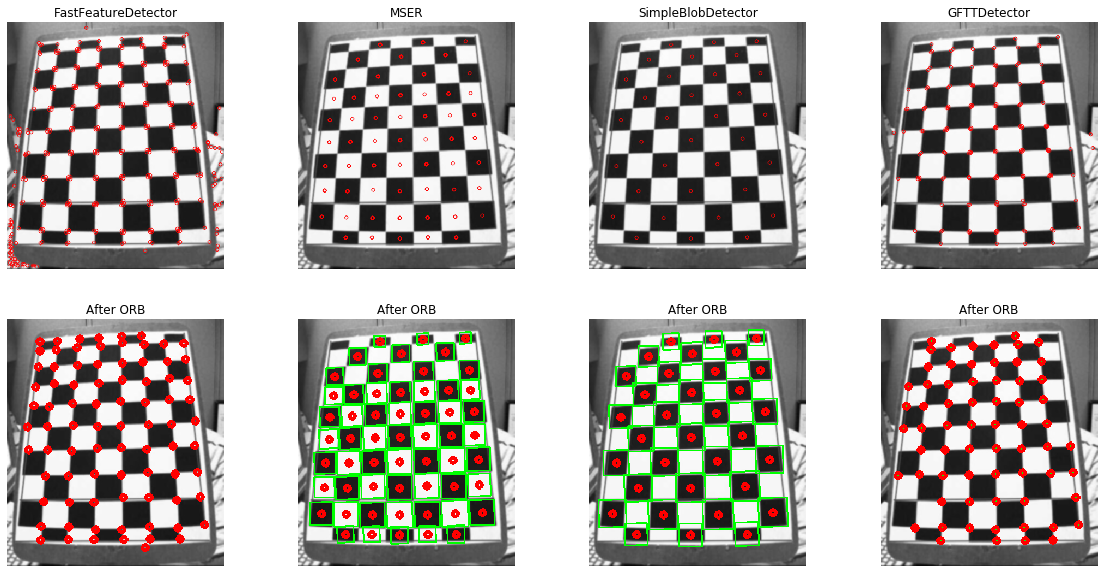

In [8]:
src = cv2.imread('./data/chessBoard.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(5,5),0.0)
orbF = cv2.ORB_create()
        
dst,dst2 = make_some_discripter(orbF)
plt_show(dst,dst2,'ORB')

### 디스크립터를 이용한 특징 매칭
디스크립터를 매칭하는 방법은 두가지가 있다.  
<code>cv2.BFMatcher</code>: BruteForce방법으로 디스크립터를 하나씩 모두 검사하여 가장 가까운 디스크립터를 찾는다.  
<code>cv2.FlannBasedMatcher</code>: Flann(Fast library for Approximate Nearest Neighbors)으로 매칭한다. 하나 이상의 매칭점을 찾거나, 매칭 특징점 개수가 많을 때 효율적이다.  

**BFMatcher 생성**  
BFMathcer를 생성할때는 <code>cv2.DescriptorBFMatcher_create(descriptorMatcherType)</code>으로 생성한다.  
**descriptor Matcher Type**  
<table class="table">
	<tr>
		<td>DescriptorMatcherType</td>
		<td>normType</td>
        <td>Descriptor or Keypoints</td>
	</tr>
    <tr>
        <td>BruteForce</td>
		<td>NORM_L2</td>
        <td rowspan="2">SIFT, SURF</td>
	</tr>
    <tr>
        <td>BruteForce-L1</td>
		<td>NORM_L1</td>
	</tr>
    <tr>
        <td>BruteForce-Hamming</td>
		<td>NORM_HAMMING</td>
        <td>ORB,BRIEF,BRISK</td>
	</tr>
    <tr>
        <td>BruteForce-Hamming(2)</td>
		<td>NORM_HAMMING2</td>
        <td>ORB,BRIEF,BRISK를 실수로 반환하는 경우</td>
	</tr>
</table>
<br>
<br>

**BFMatcher Match**  
생성된 Matcher에 의해 Match방법을 선택할 수 있다.  
- <code>cv2.DescriptorMatcher.match()</code>: 가장 좋은 매칭 반환
- <code>cv2.DescriptorMatcher.knnmatch()</code>: 사용자가 지정한 k개의 가장 좋은 매칭 반환

**BFMatcher Match Return**  
- DMatch.distance: Discriptor간의 거리로써, 작을수록 더 좋은 결과
- DMatch.trainIdx: 연습 기술자 리스트에 저장된 인덱스(img1에서 추출한 디스크립터)
- DMatch.queryIdx: 조회 기술자 리스트에 저장된 인덱스(img2에서 추출한 디스크립터)
- DMatch.imgIdx: 연습 이미지의 인덱스

**FlannBasedMatcher**  
- 생성: <code>cv2.FlannBasedMatcher_create()</code>: descripterMatcherType은 FlannBased로서 하나이다.
- Match: <code>cv2.FlannBasedMatcher.match()</code>: 위의 BFMatcher와 같이 match(), knnmatch()가 존재하며 Return Type또한 같다.


len(matches)= 500
matches[0]=(queryIdx:42, trainIdx:16, distance:380.0)
matches[1]=(queryIdx:39, trainIdx:15, distance:491.0)
matches[2]=(queryIdx:265, trainIdx:269, distance:653.0)
len(good_matches)= 382
len(matches)= 500
matches[0]=(queryIdx:0, trainIdx:0, distance:0.0)
matches[1]=(queryIdx:1, trainIdx:1, distance:0.0)
matches[2]=(queryIdx:2, trainIdx:2, distance:0.0)
len(good_matches)= 500
len(matches)= 6054
matches[0]=(queryIdx:4526, trainIdx:5663, distance:902.0)
matches[1]=(queryIdx:137, trainIdx:323, distance:1006.0)
matches[2]=(queryIdx:4553, trainIdx:24, distance:1128.0)
len(good_matches)= 4831
len(matches)= 6054
matches[0]=(queryIdx:0, trainIdx:0, distance:0.0)
matches[1]=(queryIdx:1, trainIdx:1, distance:0.0)
matches[2]=(queryIdx:2, trainIdx:2, distance:0.0)
len(good_matches)= 6054
len(matches)= 1673
matches[0][0]=(queryIdx:0, trainIdx:30, distance:1163.0)
matches[0][1]=(queryIdx:0, trainIdx:136, distance:1311.0)
matches[1][0]=(queryIdx:1, trainIdx:6, distance:1466.0)
matche

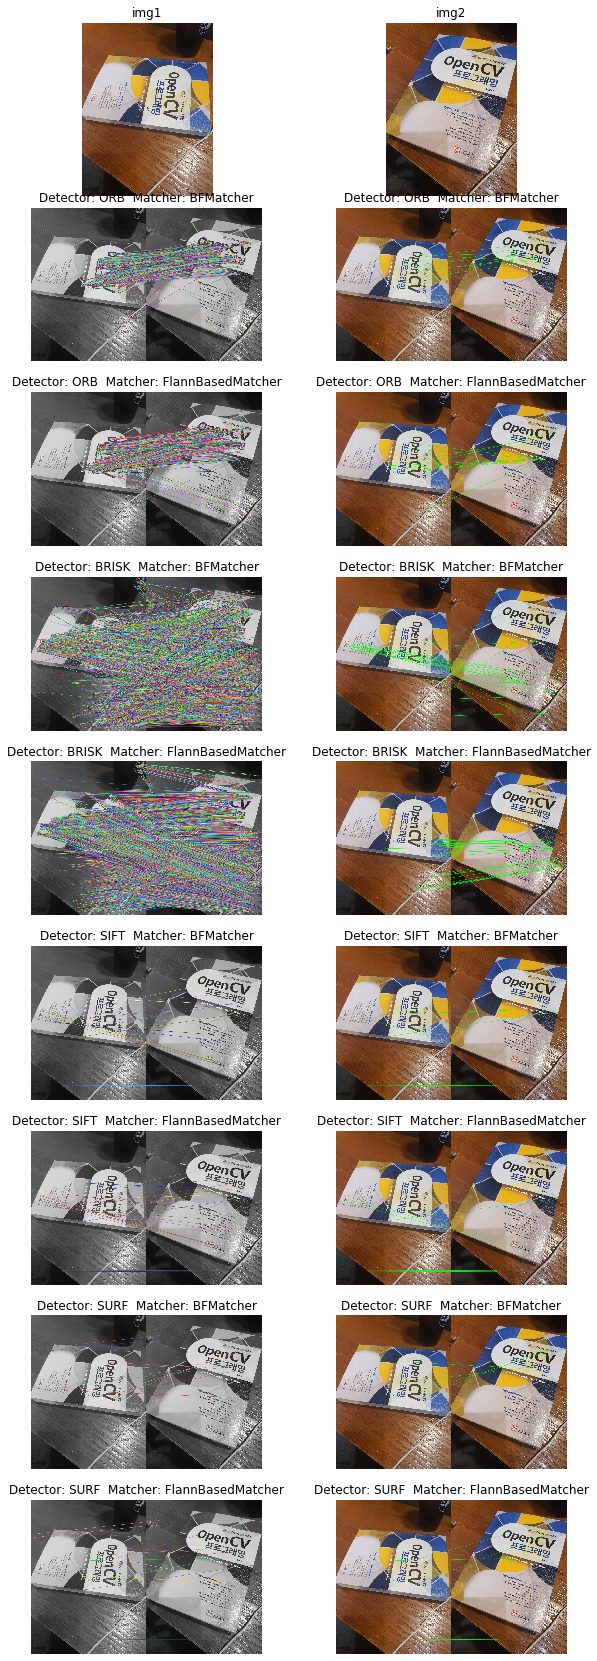

In [3]:
src1 = cv2.imread('./data/book1.jpg')
src2 = cv2.imread('./data/book2.jpg')
img1 = cv2.cvtColor(src1,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)

src1 = cv2.cvtColor(src1,cv2.COLOR_BGR2RGB)
src2 = cv2.cvtColor(src2,cv2.COLOR_BGR2RGB)

def DescriptorMatcher(detecter,img1,img2,src1,src2,matcher,option=1):
    kp1,des1 = detecter.detectAndCompute(img1,None)
    kp2,des2 = detecter.detectAndCompute(img2,None)
    
    if option ==1:
        try:
            matches = matcher.match(des1,des2)
        except:
            matches = matcher.match(np.float32(des1),np.float32(des1))
    else:
        matches = matcher.knnMatch(des1,des2,k=2)
        
    if option ==1:
        matches = sorted(matches,key=lambda m:m.distance)
        print('len(matches)=',len(matches))
        for i,m in enumerate(matches[:3]):
            print('matches[{}]=(queryIdx:{}, trainIdx:{}, distance:{})'.format(i,m.queryIdx,m.trainIdx,m.distance))
        minDist = matches[0].distance
        good_matches = list(filter(lambda m:m.distance<=4*minDist,matches))
        print('len(good_matches)=',len(good_matches))
    
    else:
        print('len(matches)=',len(matches))
        nndrRatio = 0.45
        for i,m in enumerate(matches[:3]):
            for j,n in enumerate(m):
                print('matches[{}][{}]=(queryIdx:{}, trainIdx:{}, distance:{})'.format(i,j,n.queryIdx,n.trainIdx,n.distance))
        good_matches=[]
        for f1,f2 in matches:
            if f1.distance<nndrRatio*f2.distance:
                good_matches.append(f1)
        print('len(good_matches)=',len(good_matches))
        
    if len(good_matches) < 5:
        print('sorry,too small good matches')
        return
        
    dst = cv2.drawMatches(img1,kp1,img2,kp2,good_matches,None,flags=2)
    
    src1_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches])
    src2_pts = np.float32([kp2[m.queryIdx].pt for m in good_matches])
    
    H,mask = cv2.findHomography(src1_pts,src2_pts,cv2.RANSAC,3.0)
    mask_matches = mask.ravel().tolist()
    
    h,w = img1.shape
    pts = np.float32([[0,0],[0,h-1],[w-1,h-1],[w-1,0]]).reshape(-1,1,2)
    pts2 = cv2.perspectiveTransform(pts,H)
    #src2 = cv2.polylines(src2,[np.int32(pts2)],True,(255,0,0),2)
    
    draw_params = dict(matchColor=(0,255,0),singlePointColor=None,matchesMask = mask_matches,flags=2)
    dst2 = cv2.drawMatches(src1,kp1,src2,kp2,good_matches,None,**draw_params)
    
    return dst,dst2

detector = []
detector.append((cv2.ORB_create(),'ORB'))
detector.append((cv2.BRISK_create(),'BRISK'))
detector.append((cv2.xfeatures2d.SIFT_create(),'SIFT'))
detector.append((cv2.xfeatures2d.SURF_create(),'SURF'))

matcher = []
matcher.append((cv2.BFMatcher_create(cv2.NORM_L1,crossCheck=False),'BFMatcher'))
matcher.append((cv2.FlannBasedMatcher_create(),'FlannBasedMatcher'))

plt.figure(figsize=(10,30))

imgae=plt.subplot(len(detector)*len(matcher),2,1)
imgae.set_title('img1')
plt.axis('off')
plt.imshow(src1)

imgae=plt.subplot(len(detector)*len(matcher),2,2)
imgae.set_title('img2')
plt.axis('off')
plt.imshow(src2)

count = 3
for d in detector:
    for m in matcher:
        if d[1] == 'SIFT' or d[1] == 'SURF':
            option = 0
        else:
            option = 1
        dst, dst2 = DescriptorMatcher(d[0],img1,img2,src1,src2,m[0],option)
        
        imgae=plt.subplot(len(detector)*len(matcher)+1,2,count)
        imgae.set_title('Detector: '+d[1]+'  Matcher: '+m[1])
        plt.axis('off')
        plt.imshow(dst)
        
        imgae=plt.subplot(len(detector)*len(matcher)+1,2,count+1)
        imgae.set_title('Detector: '+d[1]+'  Matcher: '+m[1])
        plt.axis('off')
        plt.imshow(dst2)
        
        count = count+2
        
plt.show()

#### SURF 특징을 사용항 BFMatcher/FlannBasedMatcher1
DescriptorMatcher.radisuMatch(des1,des2,maxDisatnce=0.3)

i= 0
len(matches[0])=1
i= 1
len(matches[1])=9
i= 2
len(matches[2])=4
i= 3
len(matches[3])=9
i= 5
len(matches[5])=4
i= 6
len(matches[6])=9
i= 7
len(matches[7])=10
i= 8
len(matches[8])=4
i= 9
len(matches[9])=4
i= 10
len(matches[10])=9
i= 11
len(matches[11])=4
i= 12
len(matches[12])=9
i= 13
len(matches[13])=4
i= 14
len(matches[14])=4
i= 15
len(matches[15])=9
i= 16
len(matches[16])=9
i= 17
len(matches[17])=9
i= 19
len(matches[19])=4
i= 20
len(matches[20])=4
i= 21
len(matches[21])=4
i= 22
len(matches[22])=4
i= 23
len(matches[23])=9
i= 24
len(matches[24])=4
i= 25
len(matches[25])=4
i= 27
len(matches[27])=9
i= 28
len(matches[28])=4
i= 29
len(matches[29])=5
i= 30
len(matches[30])=2
i= 31
len(matches[31])=9
i= 32
len(matches[32])=4
i= 33
len(matches[33])=2
i= 34
len(matches[34])=2
32


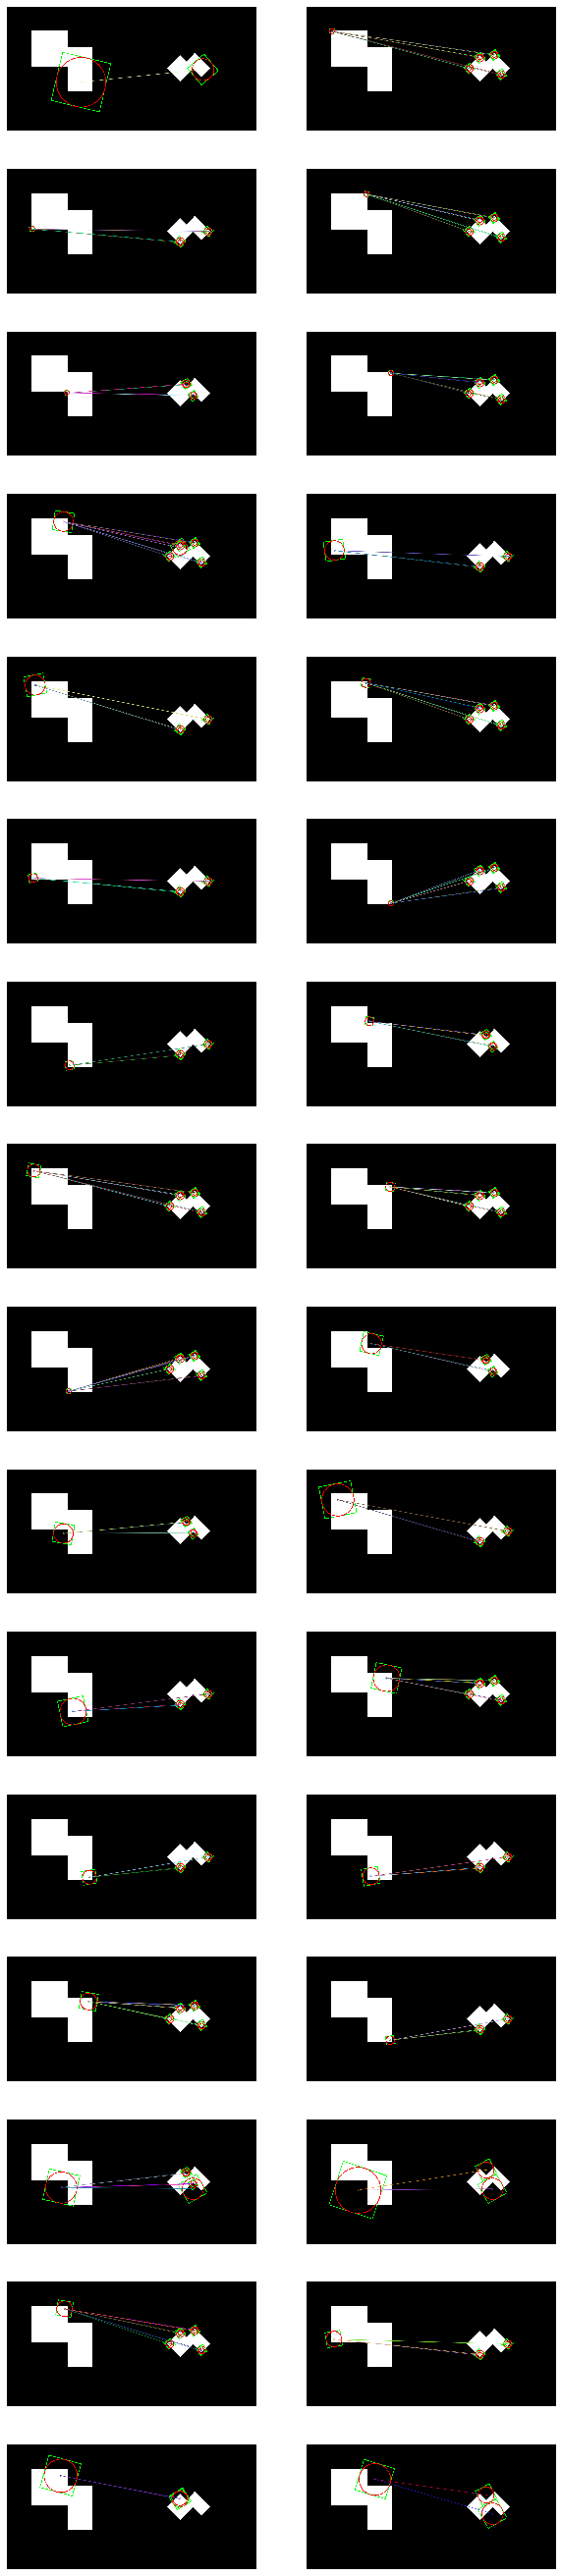

In [4]:
src1 = cv2.imread('./data/CornerTest.jpg')
src2 = cv2.imread('./data/CornerTest_Rotation.jpg')
img1 = cv2.cvtColor(src1,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)

src1 = cv2.cvtColor(src1,cv2.COLOR_BGR2RGB)
src2 = cv2.cvtColor(src2,cv2.COLOR_BGR2RGB)

def draw_key2image(kp,img):
    x,y = kp.pt
    size = kp.size
    rect = ((x,y),(size,size),kp.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(img,[box],True,(0,255,0),2)
    cv2.circle(img,(round(x),round(y)),round(size/2),(255,0,0),2)
    
def DescriptorMatcher2(detecter,src1,src2,matches):
    kp1,des1 = detecter.detectAndCompute(img1,None)
    kp2,des2 = detecter.detectAndCompute(img2,None)
    
    matches = matches.radiusMatch(des1,des2,maxDistance=0.3)
    dst = []
    for i,radius_match in enumerate(matches):
        if len(radius_match) !=0:
            print('i=',i)
            print('len(matches[{}])={}'.format(i,len(matches[i])))
            src1c = src1.copy()
            src2c = src2.copy()
            draw_key2image(kp1[radius_match[0].queryIdx],src1c)
            for m in radius_match:
                draw_key2image(kp2[m.trainIdx],src2c)
            dst.append(cv2.drawMatches(src1c,kp1,src2c,kp2,radius_match,None,flags = 2))
    return dst

surF = cv2.xfeatures2d.SURF_create()
flan = cv2.FlannBasedMatcher_create()

dst = DescriptorMatcher2(surF,src1,src2,flan)
print(len(dst))

count = 1
plt.figure(figsize=(10,100))

for d in dst:
    imgae=plt.subplot(len(dst)+1,2,count)
    plt.axis('off')
    plt.imshow(d)
    count = count+1

#### SURF 특징을 사용항 BFMatcher/FlannBasedMatcher2

len(kp1)=4704,len(kp2)=4689
len(matches)= 4704
len(good_matches)= 6623


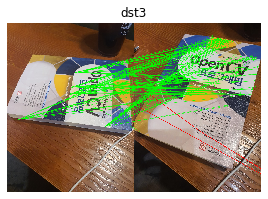

In [8]:
src1 = cv2.imread('./data/book1.jpg')
src2 = cv2.imread('./data/book2.jpg')
img1 = cv2.cvtColor(src1,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)

src1 = cv2.cvtColor(src1,cv2.COLOR_BGR2RGB)
src2 = cv2.cvtColor(src2,cv2.COLOR_BGR2RGB)

surF = cv2.xfeatures2d.SURF_create()
kp1,des1 = surF.detectAndCompute(img1,None)
kp2,des2 = surF.detectAndCompute(img2,None)
print('len(kp1)={},len(kp2)={}'.format(len(kp1),len(kp2)))

distT = 0.1
flan = cv2.FlannBasedMatcher_create()
matches = flan.radiusMatch(des1,des2,maxDistance=distT)
print('len(matches)=',len(matches))

good_matches=[]
for i,radius_match in enumerate(matches):
    if len(radius_match) !=0:
        for m in radius_match:
            good_matches.append(m)
            
print('len(good_matches)=',len(good_matches))

src1_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches])
src2_pts = np.float32([kp2[m.queryIdx].pt for m in good_matches])

H,mask = cv2.findHomography(src1_pts,src2_pts,cv2.RANSAC,3.0)
mask_matches = mask.ravel().tolist()

h,w = img1.shape
pts = np.float32([[0,0],[0,h-1],[w-1,h-1],[w-1,0]]).reshape(-1,1,2)

pts2 = cv2.perspectiveTransform(pts,H)
src2 = cv2.polylines(src2,[np.int32(pts2)],True,(255,0,0),2)

draw_params = dict(matchColor=(0,255,0),singlePointColor=None,matchesMask=mask_matches,flags=2)
dst3 = cv2.drawMatches(src1,kp1,src2,kp2,good_matches,None,**draw_params)

plt.figure(figsize=(10,10))
imgae=plt.subplot(2,2,1)
plt.axis('off')
plt.title('dst3')
plt.imshow(dst3)

plt.show()

### HOG 디스크립터

HOG(Histogram of Oriented Gradients)는 사람을 검출하기 위해 사용한 디스크립터로 물체 인식에 많이 사용된다.  
HOG 디스크립터의 과정은 아래와 같다.  
<img src="https://t1.daumcdn.net/cfile/tistory/26281B3F5812EC6728"><br>
사진 출처:<a href="https://eehoeskrap.tistory.com/98">꾸준히 블로그</a><br>

위와 같은 과정을 알아보기 위하여 과정을 상세히 알아보자.  
<br>

**1. Input Data Resize**  
HOG 디스크립터의 과정을 거치기 위하여 Image를 Crop(일정 크기로 자른 뒤)한 뒤 Resize(64,128)로서 바꿀 필요가 있다.  
Resize의 크기는 패치의 종횡 비가 1:2만 되면 되는 것이지 (64,128)이라는 크기는 Default한 크기이다.  
Crop을 하기 위해서는 Sliding Window(100,200)를 사용하여 원본 이미지에서 Crop뒤 Resize의 형태로 바꾼다.  
<img src="http://postfiles14.naver.net/MjAxNzEyMjhfMTk0/MDAxNTE0NDQ4NTAwOTAy.Odpt7SsGH2gDr57Wgaslm62sehFwu6B_hKKpvbkFijkg.phaGq9icCwARnlhMJCCp-EyKQk0liQOM1fa9H_uOEGwg.JPEG.tommybee/1.jpg?type=w773"><br>
사진 출처:<a href="http://blog.naver.com/PostView.nhn?blogId=tommybee&logNo=221173056260&parentCategoryNo=&categoryNo=57&viewDate=&isShowPopularPosts=true&from=search">tommybee 블로그</a><br>
<br>

**2. Gradient 계산**  
x, y 축에 대하여 Edge 추출을 위하여 간단한 Kernel을 입힘으로써 Edge를 계산한다.  
<img src="http://postfiles14.naver.net/MjAxNzEyMjhfMjE1/MDAxNTE0NDQ4NTUyOTQ0.joyAEt4cFDtNObaR2wiY3eApHh6E8L3yUFqvwcxP66cg.fY0xi_fbJic24UDhCPhZ1TdTEKNnMO6R0JgqKjHArqsg.JPEG.tommybee/1.jpg?type=w773"><br>
사진 출처:<a href="http://blog.naver.com/PostView.nhn?blogId=tommybee&logNo=221173056260&parentCategoryNo=&categoryNo=57&viewDate=&isShowPopularPosts=true&from=search">tommybee 블로그</a><br>
<br>
위의 과정을 통하여 각각의 Gradient를 구할 수 있다.  
<br>

**3. 8x8 셀 내의 Histogram of Gradient 계산하기**  
<img src="http://postfiles6.naver.net/MjAxNzEyMjhfMjk3/MDAxNTE0NDQ4Nzc0Mzgy.FvAbOZZSyDTKM9jhYg9AZV3vbxqrkWYGoM6bwXBobNIg.jYYW6KVFCzGpNS9XltnvW9hxnxxPu-VVbgCcGNOhDzIg.PNG.tommybee/1.png?type=w773"><br>
사진 출처:<a href="http://blog.naver.com/PostView.nhn?blogId=tommybee&logNo=221173056260&parentCategoryNo=&categoryNo=57&viewDate=&isShowPopularPosts=true&from=search">tommybee 블로그</a><br>
위의 사진과 같이 Crop -> Resize된 이미지를 8x8 Size의 pixel로 나눈다.  
이러한 결과로 인하여 세로 16(128/8), 가로 8(64/8)칸의 Image로서 다시 표현되게 된다.  
8x8 Size의 Pixel은 많은 실험결과 **64x128 Size의 이미지에서 특정 ROI(얼굴, 머리 상단 등)을 캡쳐할 수 있을 정도의 충분한 크기라는 것 이다.**  
만약 Crop 과 Resize의 크기를 변환시킨다면 이러한 ROI영역을 잡는 크기를 변경하면서 최적의 형태를 알아봐야 할 것이다.  
<br>

**4. Histogram으로서의 표현**  
<img src="http://postfiles5.naver.net/MjAxNzEyMjhfMTU5/MDAxNTE0NDQ4OTMzMTU0.JeDuC9FP4gmzDbEKKiIiQX32nrDc6nbcD6lMDk0e7v8g.Wz5ElgWjfGylRwqEDV4k8VQUvWadxNB1Flps1pOr_Zsg.PNG.tommybee/1.png?type=w773"><br>
사진 출처:<a href="http://blog.naver.com/PostView.nhn?blogId=tommybee&logNo=221173056260&parentCategoryNo=&categoryNo=57&viewDate=&isShowPopularPosts=true&from=search">tommybee 블로그</a><br>

하나의 8x8 패치에 대한 Gradient의 크기와 방향에 대해서 나타낸 사진이다.  
위와 같은 사진의 결과는 0 ~ 360도도가 아닌 signedGradient=False인 경우이다.  
따라서 모든 각도를 0 ~ 180도로 표현한 것 이다.  

위와 같은 결과를 몇개의 bin으로서 표현할 지 정하여서 나타낸다.  
아래의 사진은 nbins=9로 두어서 0 ~ 180도를 9개의 bin으로서 표현한 것 이다.  
<img src="http://postfiles16.naver.net/MjAxNzEyMjhfMjMx/MDAxNTE0NDQ4OTg1MjE3.RfwC3yGEKzVYWxr8unXz0wYiYovwze-KL_e9TMlaecQg.JOVc_ftGn4a9yKqaF3q5aWMw9RsgrhnDhVgYgi7aJjkg.PNG.tommybee/1.png?type=w773"><br>
사진 출처:<a href="http://blog.naver.com/PostView.nhn?blogId=tommybee&logNo=221173056260&parentCategoryNo=&categoryNo=57&viewDate=&isShowPopularPosts=true&from=search">tommybee 블로그</a><br>
위의 사진을 보게되면 각각의 각도에 맞는 값을 부여하는 것을 알 수 있다.  
**주의해야 하는 점은 정확히 bins를 나눈 각도가 아닌 값은 비례하여 나누어서 값이 들어가는 것을 알 수 있다.**  
<img src="http://postfiles1.naver.net/MjAxNzEyMjhfMTI4/MDAxNTE0NDQ5MDE0ODQ2.-EQHuF-DNVPJkDtYan0ihX32aDz-luOHn4apwgKpYgUg.VMEFbvca8Ib9H9IAqcIO-MZ-BVRKKYQHFJW_gLcBlu4g.PNG.tommybee/1.png?type=w773"><br>
사진 출처:<a href="http://blog.naver.com/PostView.nhn?blogId=tommybee&logNo=221173056260&parentCategoryNo=&categoryNo=57&viewDate=&isShowPopularPosts=true&from=search">tommybee 블로그</a><br>
위의 사진은 160 ~ 180도의 각도를 가지는 값은 0 ~ 20도의 값으로 들어가는 것을 표현한 것 이다.  

위와 과정을 거친 결과는 아래와 같다.   
<img src="http://postfiles16.naver.net/MjAxNzEyMjhfMTY0/MDAxNTE0NDQ5MDQyOTc5.wNNGbap06M5J9f-Iw4SX83o0Oo0h0rkyVvJVssk_9sMg.9zMzcPmhL19u1pSePTs7edZebY8Ip2mI1m81AtTUQX0g.PNG.tommybee/1.png?type=w773"><br>
사진 출처:<a href="http://blog.naver.com/PostView.nhn?blogId=tommybee&logNo=221173056260&parentCategoryNo=&categoryNo=57&viewDate=&isShowPopularPosts=true&from=search">tommybee 블로그</a><br>

위의 결과를 해설하자면 흔히 우리는 각도를 다음과 같이 표현한다.  
<p>$$\theta = \frac{\frac{\partial I}{\partial y}}{\frac{\partial I}{\partial x}}$$</p>
즉 위의 결과를 살펴보면 y축을 기준으로 0과 180도 근처에서 많은 가중치를 가지고 있다.  
즉, Gradient가 위 또는 아래를 가르키고 있다고 설명할 수 있다.  

**Gradient 가 위 또는 아래를 가르키고 있다는 것은 x축방향으로의 Edge가 존재한다 라고 생각할 수 있다.(실제 계산한 사진을 보게되면 사람의 머리의 Gradinet를 계산하여 x축 방향으로의 Edge가 존재한다는 것을 시각적으로 알 수 있다.)**  

<br>

**5. 16 x 16 블록 정규화**  
**정규화를 하는 이유는 조명과 같이 밝기에 대하여 독립적이기 위하여 정규화를 실시한다.**  
<img src="http://postfiles16.naver.net/MjAxNzEyMjhfOTUg/MDAxNTE0NDQ5MDk0ODM4.T6mhSfYmGY3nJm3ZeXrg8O8q3N9HGAfkNEB_WouOgnEg.MhJtUrp2sF8aA19mEGo0LBEveGJw8fIi34yUeqhzmlwg.GIF.tommybee/1.gif?type=w773"><br>
사진 출처:<a href="http://blog.naver.com/PostView.nhn?blogId=tommybee&logNo=221173056260&parentCategoryNo=&categoryNo=57&viewDate=&isShowPopularPosts=true&from=search">tommybee 블로그</a><br>

먼저 우리는 하나의 Patch를 4. Histogram으로 표현을 통하여 9차원의 Vector로서 표현하였다.  
이러한 Vector를 16x16블록으로서 정규화를 하게 되면 2(16/8) * 2(16/8) * 9 로서 36차원의 Vector로서 나타낼 수 있다.  
이러한 Vector를 식으로서 간단히 타나내면 다음과 같다.  
<p>$$V = [v1, v2, v3, ....., v36]$$</p>
위의 과정을 L2 Norm을 사용하여 계산하면 다음과 같다.  
<p>$$V' = [\frac{v1}{\alpha}, \frac{v2}{\alpha}, \frac{v3}{\alpha}, ....., \frac{v36}{\alpha}]$$</p>
<p>$$\alpha = \sqrt{v1^2+v2^2+ ... +v36^2}$$</p>

**6. HOG 형상 벡터 계산하기**  
최종적인 Vector를 계산하여 보자.  
위에서 16 x 16 블록 정규화를 위해 Window를 Sliding한다고 하면 다음과 같은 결과를 얻을 수 있다.  
가로(8-1) * 세로(16-1) = 105개의 Patch가 만들어진다.  
각각의 Patch는 위에서 36차원의 Vector로서 표현된다.  
따라서 36 * 105 = 3780의 차원 Vector로서 비교하여 Matching할 수 있다.  

최종적인 결과는 아래 사진과 같다.  
<img src="http://postfiles13.naver.net/MjAxNzEyMjhfOTAg/MDAxNTE0NDQ5Mzg1NDE0.owrE_337GIkM5NIrI_JbUW6fu0tmSKsUOK8qvyNRaO4g.2F1cX_QfNt4DgCfVPjit9YFJdpHk7pEaIgGBkvrQY1Eg.PNG.tommybee/1.png?type=w773"><br>
사진 출처:<a href="http://blog.naver.com/PostView.nhn?blogId=tommybee&logNo=221173056260&parentCategoryNo=&categoryNo=57&viewDate=&isShowPopularPosts=true&from=search">tommybee 블로그</a><br>

**7. Object Detect**  
SVM Algorithm을 사용하여 미리계산된 Obejct가 맞는지 비교한다.  
아래 예제에서는 <code>hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())</code>을 통하여 사람인지 아닌지를 Detect하고 있다.  

#### HOG 디스크립터 계산
<code>HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins, win_sigma, threshold_L2hys, gamma_correction, nlevels)</code>: HOG Descriptor 생성<br>

**parameter**
- win_size: 탐지 윈도우 사이즈
- block_size: "5. 16 x 16 블록 정규화"에서 사용하는 블록 사이즈 (16,16)만 가능
- block_stride: "1. Input Data Resize"에서 Sliding Window 사이즈 1:2 비율이여야 함
- cell_size: "3. 8x8 셀 내의 Histogram of Gradient 계산하기"에서의 Patch Size (8,8)만 가능
- nbins: "4. Histogram으로서의 표현"에서 bins의 개수

<br>

<code>setSVMDetector(detector)</code>: SVM Detector<br>

**parameter**
- detector: 선형 SVM 분류기

<br>

<code>detect(img, found_locations, hit_threshold, win_stride, padding)</code>: 객체 탐지<br>

**parameter**
- img : 원본 이미지, CV_8UC1 and CV_8UC4 타입 만 지원
- found_locations : 감지된 객체 경계의 왼쪽 상단 코너점 
- wind_stride : 윈도우의 폭, 블록 폭의 배수여야 함 
- padding : CPU 인터페이스 호환성을 유지하기 위한 파라미터, (0, 0)이어야 함


<br>

<code>detectMultiScale(img, found_locations, hit_threshold, win_stride, padding, scale0, group_threshold)</code>: 객체 탐지를 좀 더 편하게 나타내기 위해 Return 형태 정함<br>

**parameter**
- img : 원본 이미지, CV_8UC1 and CV_8UC4 타입 만 지원
- found_locations : 탐지된 객체 경계
- hit_threshold : feature와 SVM 평면 간 사이에 대한 임계값, 보통 0, 자유계수, 생략됨 
- win_stride : 윈도우의 폭, 블록 폭의 배수여야 함, 이를 작게 할 수록 탐지 시간이 늘어나며, 반대로 크게 하면 탐색 윈도우 숫자는 더 작아지고, 이는 탐지속도를 빠르게 해주지만 탐지를 못할 확률이 높아짐 

<br>

des1.shape= (3780, 1)
des2.shape= (3780, 1)
des2= [[0.35513002]
 [0.09568468]
 [0.09452201]
 ...
 [0.2877093 ]
 [0.17257611]
 [0.208312  ]]
des3.shape= (3780, 1)
des3= [[0.31009826]
 [0.06603438]
 [0.09555499]
 ...
 [0.11499894]
 [0.11523405]
 [0.4372644 ]]


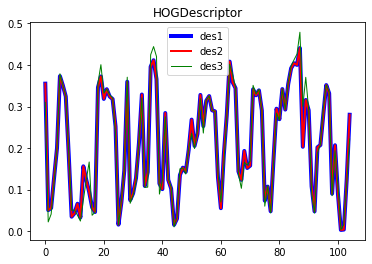

In [11]:
src = cv2.imread('./data/people1.jpg')

hog1 = cv2.HOGDescriptor()
des1 = hog1.compute(src)
print('des1.shape=',des1.shape)

winSize=(64,128)
blockSize = (16,16)
blockStride = (8,8)
cellSize=(8,8)

nbins = 9
derivAperture = 1
winSigma = -1
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = True
nlevels = 64
signedGradient = False
hog2 = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,
                        derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,
                         gammaCorrection,nlevels,signedGradient
                        )
des2 = hog2.compute(src)
print('des2.shape=',des2.shape)
print('des2=',des2)

gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
des3 = hog1.compute(gray)
print('des3.shape=',des3.shape)
print('des3=',des3)

plt.title('HOGDescriptor')
plt.plot(des1[::36],color='b',linewidth=4,label='des1')
plt.plot(des2[::36],color='r',linewidth=2,label='des2')
plt.plot(des3[::36],color='g',linewidth=1,label='des3')
plt.legend(loc='best')
plt.show()

#### HOG 특징을 이용한 사람 검출

len(loc1)= 5
len(loc2)= 3
len(loc3)= 5


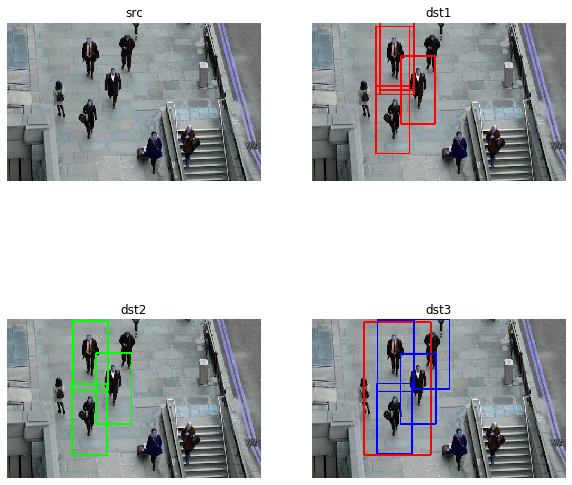

In [14]:
src = cv2.imread('./data/people.jpg')
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

loc1,weights1 = hog.detect(src)
print('len(loc1)=',len(loc1))
dst1 = src.copy()
w,h = hog.winSize
for pt in loc1:
    x,y = pt
    cv2.rectangle(dst1,(x,y),(x+w,y+h),(255,0,0),2)

dst2 = src.copy()
loc2,weights2 = hog.detectMultiScale(src)
print('len(loc2)=',len(loc2))
for rect in loc2:
    x,y,w,h = rect
    cv2.rectangle(dst2,(x,y),(x+w,y+h),(0,255,0),2)
    
dst3 = src.copy()
loc3,weights3 = hog.detectMultiScale(src,winStride=(1,1),padding=(8,8))
print('len(loc3)=',len(loc3))
for i,rect in enumerate(loc3):
    x,y,w,h = rect
    if weights3[i] > 0.7:
        cv2.rectangle(dst3,(x,y),(x+w,y+h),(0,0,255),2)
    else:
        cv2.rectangle(dst3,(x,y),(x+w,y+h),(255,0,0),2)
        
plt.figure(figsize=(10,10))
imgae=plt.subplot(2,2,1)
plt.axis('off')
plt.title('src')
plt.imshow(src)

imgae=plt.subplot(2,2,2)
plt.axis('off')
plt.title('dst1')
plt.imshow(dst1)

imgae=plt.subplot(2,2,3)
plt.axis('off')
plt.title('dst2')
plt.imshow(dst2)

imgae=plt.subplot(2,2,4)
plt.axis('off')
plt.title('dst3')
plt.imshow(dst3)

plt.show()

### 영상 스티칭
여러 장의 영상의 겹친 부분을 이음매 없이(seamless) 이어서 하나의 파노라마 영상으로 만드는 것을 영상 스티칭(stitching)이라 한다.  
특징점 검출과 디스크립터를 사용하여 매칭점을 검출하고 변환을 사용하여 스티칭할 수 있다.  
**즉, 서로 다른 이미지에서 같은 KeyPoints와 Descripter를 계산하여 일치하는 곳을 서로 Pixel을 이어주는 방법이다.**  
OpenCV에서는 <code>cv2.Sititcher</code>클래스를 사용하여 구현할 수 있다.  
단, 제한된 Method만 사용할 수 있다.

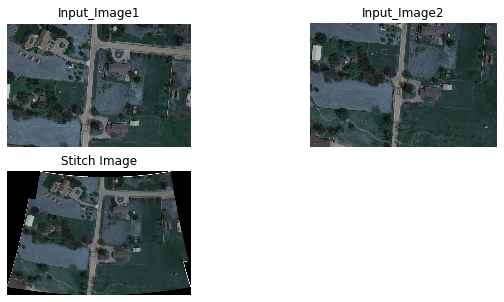

In [25]:
src1 = cv2.imread('./data/stitch_image1.jpg')
src2 = cv2.imread('./data/stitch_image2.jpg')
w,h,_ = src1.shape

sticher = cv2.createStitcher()
status,dst = sticher.stitch((src1,src2))
dst = cv2.resize(dst, dsize=(h,w), interpolation=cv2.INTER_AREA)

plt.figure(figsize=(10,5))
plt.title('Stitch Output')
imgae=plt.subplot(2,2,1)
plt.axis('off')
plt.title('Input_Image1')
plt.imshow(src1)

imgae=plt.subplot(2,2,2)
plt.axis('off')
plt.title('Input_Image2')
plt.imshow(src2)

imgae=plt.subplot(2,2,3)
plt.axis('off')
plt.title('Stitch Image')
plt.imshow(dst)